# TASK 1

IRIS FLOWER CLASSIFICATION

- Iris flower has three species; setosa, versicolor, and virginica, which differs according to their measurements. Now assume that you have the measurements of the iris flowers according to their species, and here your task is to train a machine learning model that can learn from the measurements of the iris species and classify them.
- Although the Scikit-learn library provides a dataset for iris flower classification, you can also download the same dataset from here for the task of iris flower classification with Machine Learning. 

Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings(action='ignore')

In [3]:
df = pd.read_csv('IRIS.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
df.shape

(150, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [10]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [11]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [12]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

In [13]:
df.duplicated().any()

True

In [14]:
duplicate_count = df.duplicated().sum()
print("Total Duplicate Record:", duplicate_count)

Total Duplicate Record: 3


In [15]:
df.drop_duplicates(inplace=True)

In [16]:
df.duplicated().sum()

0

In [17]:
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [18]:
df['species'].value_counts()

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: species, dtype: int64

Data Visualization 

In [19]:
sns.set()

<Axes: xlabel='species', ylabel='count'>

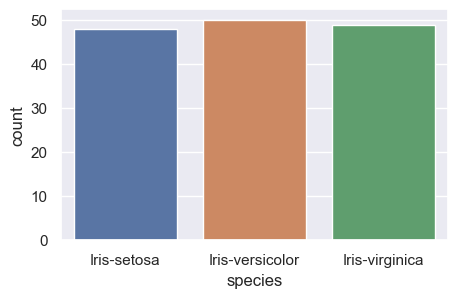

In [20]:
plt.figure(figsize=(5,3))
sns.countplot(x='species', data=df)

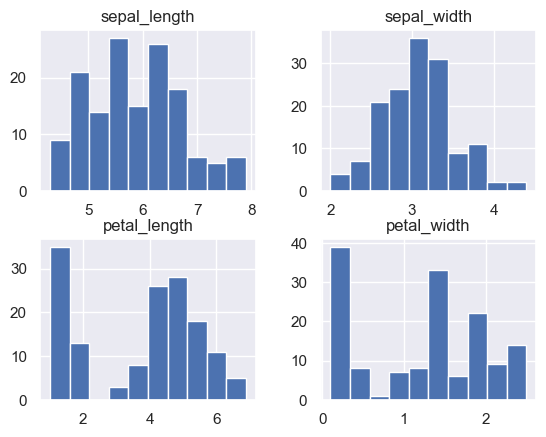

In [21]:
df.hist()
plt.show()

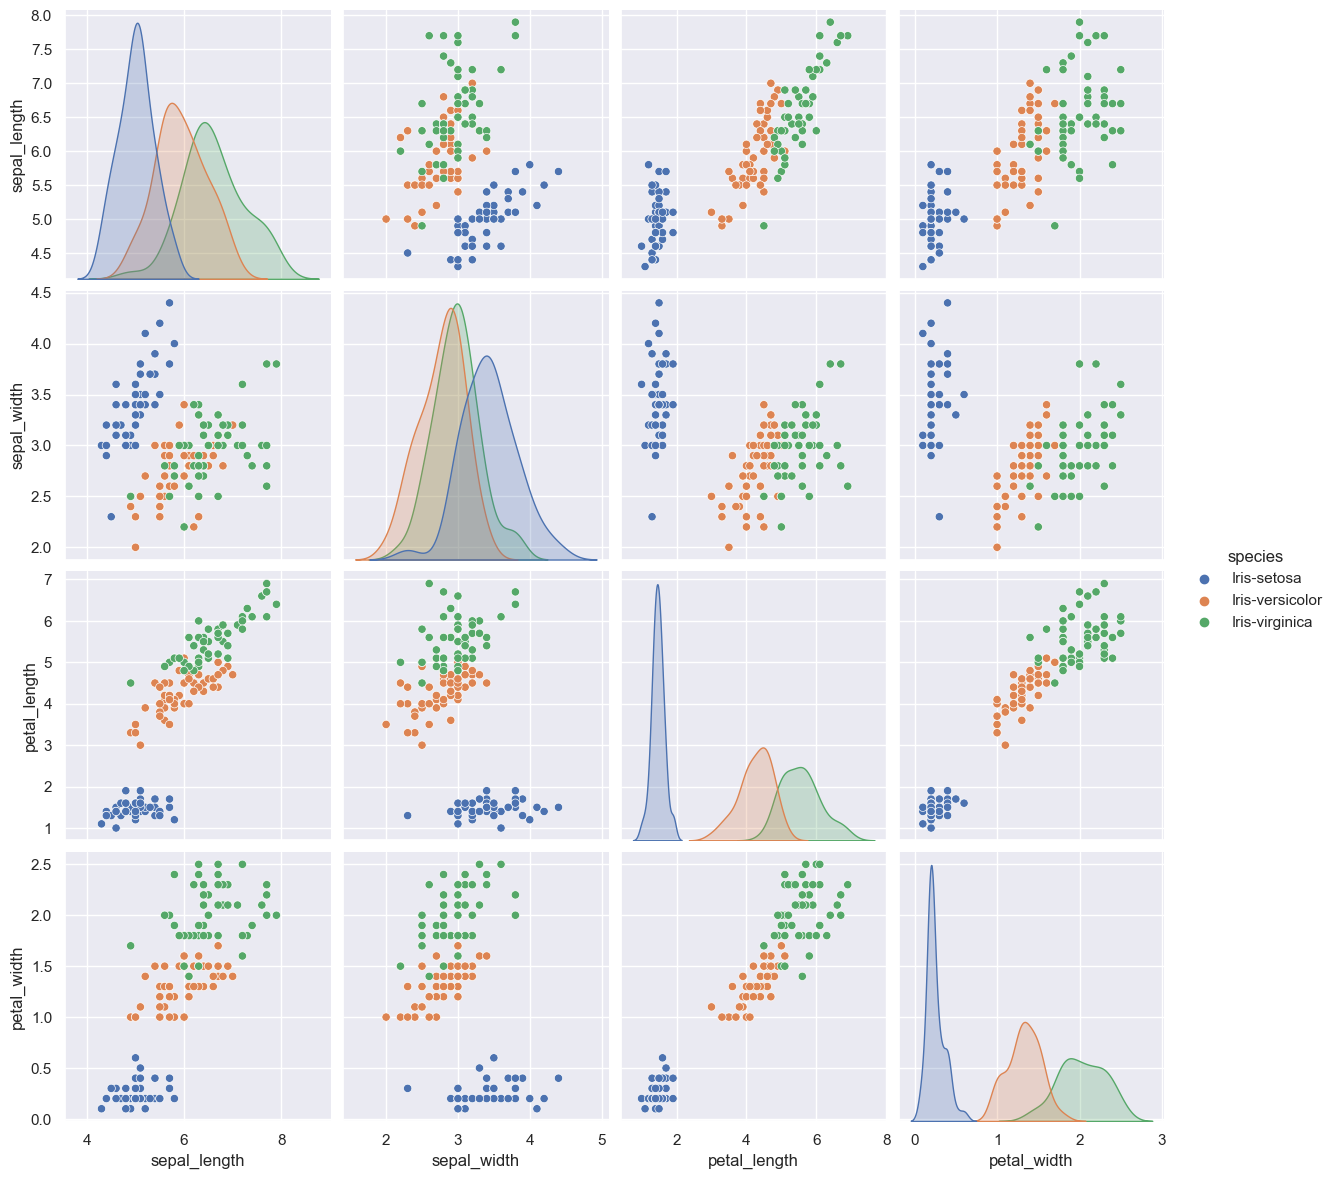

In [22]:
sns.pairplot(df,hue="species",height=3)

sepal_length       Axes(0.125,0.53;0.133621x0.35)
sepal_width     Axes(0.285345,0.53;0.133621x0.35)
petal_length     Axes(0.44569,0.53;0.133621x0.35)
petal_width     Axes(0.606034,0.53;0.133621x0.35)
dtype: object

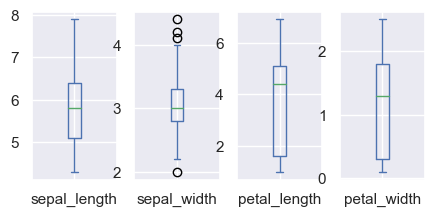

In [23]:
df.plot(kind ='box',subplots = True, layout =(2,5),sharex = False)

<Axes: >

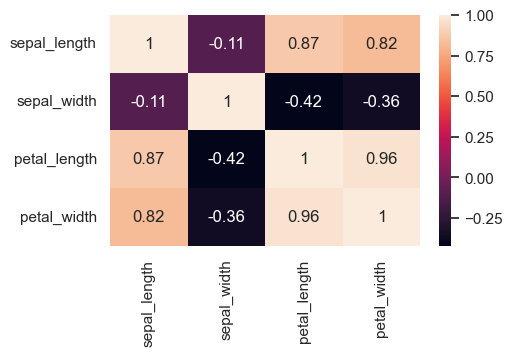

In [24]:
plt.figure(figsize=(5,3))
sns.heatmap(df.corr(),annot=True)

<Axes: >

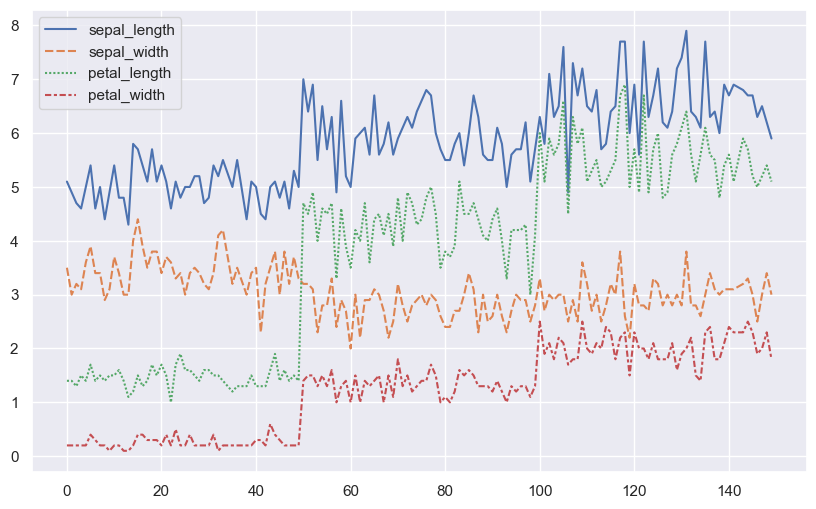

In [25]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df.drop(['species'],axis=1))

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>]], dtype=object)

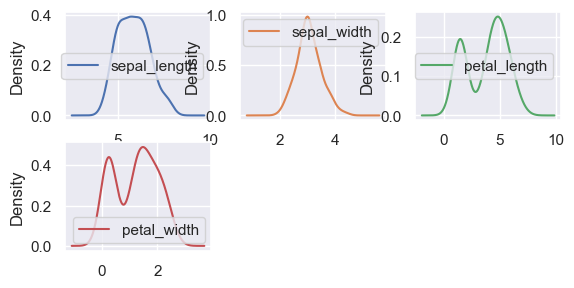

In [26]:
df.plot(kind ='density',subplots = True, layout =(3,3),sharex = False)

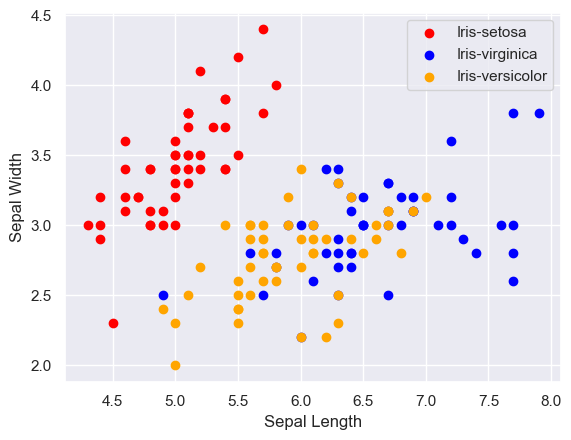

In [27]:
colors = ['red','blue','orange']
species = ['Iris-setosa','Iris-virginica','Iris-versicolor']
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['sepal_length'],x['sepal_width'],c=colors[i],label=species[i])
    plt.xlabel("Sepal Length")
    plt.ylabel("Sepal Width")
    plt.legend()

In [28]:
x = df.drop(columns=['species'])
y = df['species']

In [29]:
print(x)

     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[147 rows x 4 columns]


In [30]:
print(y)

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 147, dtype: object


In [31]:
df.groupby('species')['sepal_length'].count()

species
Iris-setosa        48
Iris-versicolor    50
Iris-virginica     49
Name: sepal_length, dtype: int64

([<matplotlib.patches.Wedge at 0x217604aad90>,
 [Text(0.5702318449125439, 0.9406570273206046, 'Iris-setosa'),
  Text(-1.0997488036306475, 0.023506784402800476, 'Iris-versicolor'),
  Text(0.5499999702695115, -0.9526279613277875, 'Iris-virginica')],
 [Text(0.3110355517704784, 0.5130856512657843, '32.7%'),
  Text(-0.5998629837985349, 0.012821882401527531, '34.0%'),
  Text(0.2999999837833699, -0.5196152516333385, '33.3%')])

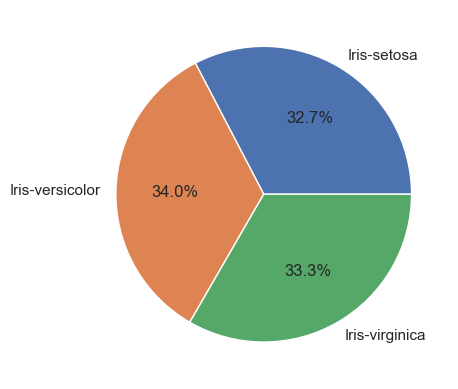

In [32]:
values=(48,50,49)
labels=('Iris-setosa','Iris-versicolor','Iris-virginica')
plt.pie(values,labels=labels,autopct="%2.1f%%")

Model Training

In [33]:
corr_mat = df.corr()
print(corr_mat)

              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.109321      0.871305     0.817058
sepal_width      -0.109321     1.000000     -0.421057    -0.356376
petal_length      0.871305    -0.421057      1.000000     0.961883
petal_width       0.817058    -0.356376      0.961883     1.000000


In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn import metrics

In [35]:
train,test=train_test_split(df,test_size=0.25)
print(train.shape)
print(test.shape)

(110, 5)
(37, 5)


In [36]:
train_X=train[['sepal_length','sepal_width','petal_length','petal_width']]
train_y=train.species

test_X=test[['sepal_length','sepal_width','petal_length','petal_width']]
test_y=test.species

In [37]:
train_X.head()

,sepal_length,sepal_width,petal_length,petal_width
89,5.5,2.5,4.0,1.3
28,5.2,3.4,1.4,0.2
5,5.4,3.9,1.7,0.4
12,4.8,3.0,1.4,0.1
108,6.7,2.5,5.8,1.8


In [38]:
train_y.head()

89     Iris-versicolor
28         Iris-setosa
5          Iris-setosa
12         Iris-setosa
108     Iris-virginica
Name: species, dtype: object

In [39]:
test_X.head()

,sepal_length,sepal_width,petal_length,petal_width
112,6.8,3.0,5.5,2.1
39,5.1,3.4,1.5,0.2
6,4.6,3.4,1.4,0.3
137,6.4,3.1,5.5,1.8
75,6.6,3.0,4.4,1.4


In [40]:
test_y.head()

112     Iris-virginica
39         Iris-setosa
6          Iris-setosa
137     Iris-virginica
75     Iris-versicolor
Name: species, dtype: object

Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(train_X,train_y)

LogisticRegression()

In [42]:
prediction=model.predict(test_X)
print('Accuracy:',metrics.accuracy_score(prediction,test_y))

Accuracy: 0.972972972972973


Confusion Matrix

In [43]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_mat=confusion_matrix(test_y,prediction)
print("Confusion matrix: \n",confusion_mat)
print(classification_report(test_y,prediction))

Confusion matrix: 
 [[11  0  0]
 [ 0 12  1]
 [ 0  0 13]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.93      1.00      0.96        13

       accuracy                           0.97        37
      macro avg       0.98      0.97      0.97        37
   weighted avg       0.97      0.97      0.97        37



KNN Neighbors

In [44]:
from sklearn.neighbors import KNeighborsClassifier
model1=KNeighborsClassifier(n_neighbors=5)
model1.fit(train_X,train_y)

KNeighborsClassifier()

In [45]:
y_pred1=model1.predict(test_X)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(test_y,y_pred1))

Accuracy Score: 0.972972972972973


Decision Tree

In [46]:
from sklearn.tree import DecisionTreeClassifier
model2=DecisionTreeClassifier(criterion="entropy",random_state=7)
model2.fit(train_X,train_y)

DecisionTreeClassifier(criterion='entropy', random_state=7)

In [47]:
y_pred2=model2.predict(test_X)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(test_y,y_pred2))

Accuracy Score: 0.972972972972973


Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier
model5=RandomForestClassifier()
model5.fit(train_X,train_y)

RandomForestClassifier()

In [49]:
y_pred5=model5.predict(test_X)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(test_y,y_pred5))

Accuracy Score: 0.972972972972973


Accuracy of Different-Different Models

Text(0.5, 1.0, 'Accuracy of Different-Different Models')

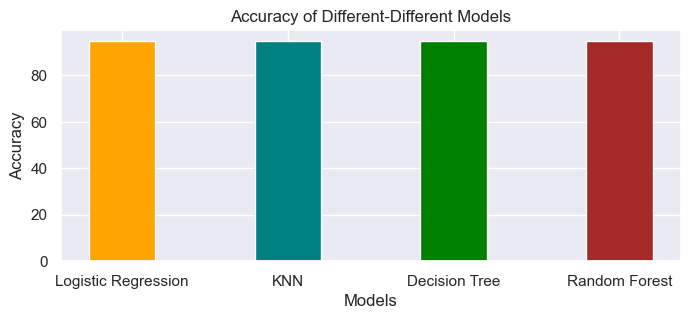

In [50]:
iris_data={'Logistic Regression':94.73,'KNN':94.73,'Decision Tree':94.73,'Random Forest':94.73} 
model=list(iris_data.keys()) 
accuracy=list(iris_data.values())
plt.figure(figsize=(8,3))
barWidth=0.4
color=['orange','teal','green','brown']
label=['Logistic Regression','KNN','Decision Tree','Random Forest']
plt.bar(model,accuracy,color=color,width=barWidth,label=label)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different-Different Models')